<img src="dataset-cover.jpg" alt="Alternative text" />

# Wine data assessment

In [1]:
import pandas as pd
import numpy as np

wine_data = pd.read_csv("winequality.csv")

wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Step 2: Exploratory Data Analysis (EDA)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Display summary statistics

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
# Display data types and missing values

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Visualize missing values

In [5]:
print('--- Categories with missing values, % ---\n')
percent_missing = wine_data.isnull().sum() * 100 / len(wine_data)
print(percent_missing[percent_missing > 0])

--- Categories with missing values, % ---

fixed acidity       0.153917
volatile acidity    0.123134
citric acid         0.046175
residual sugar      0.030783
chlorides           0.030783
pH                  0.138525
sulphates           0.061567
dtype: float64


[Text(0.5, 1.0, 'Wine quality distribution'),
 Text(0.5, 0, 'Wine quality'),
 Text(0, 0.5, 'Count')]

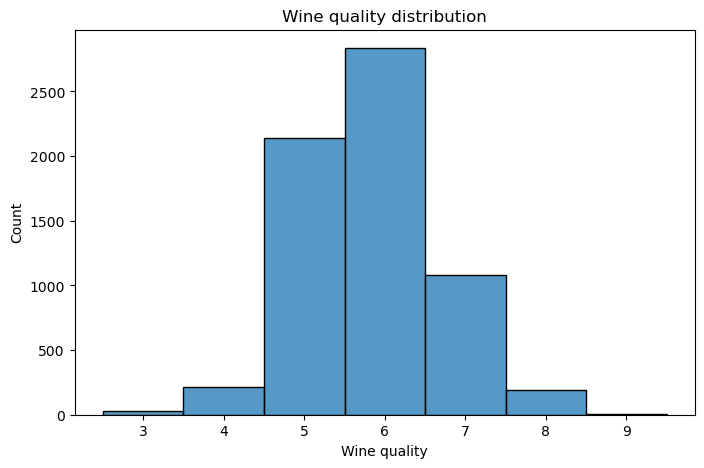

In [6]:
# Plot distribution of the target variable

fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(wine_data["quality"], discrete=True, ax = ax).set(title="Wine quality distribution",
                                                                xlabel='Wine quality', 
                                                                ylabel='Count') 

### Correlation heatmap

Text(0.5, 1.0, 'Features Correlating with Wine quality')

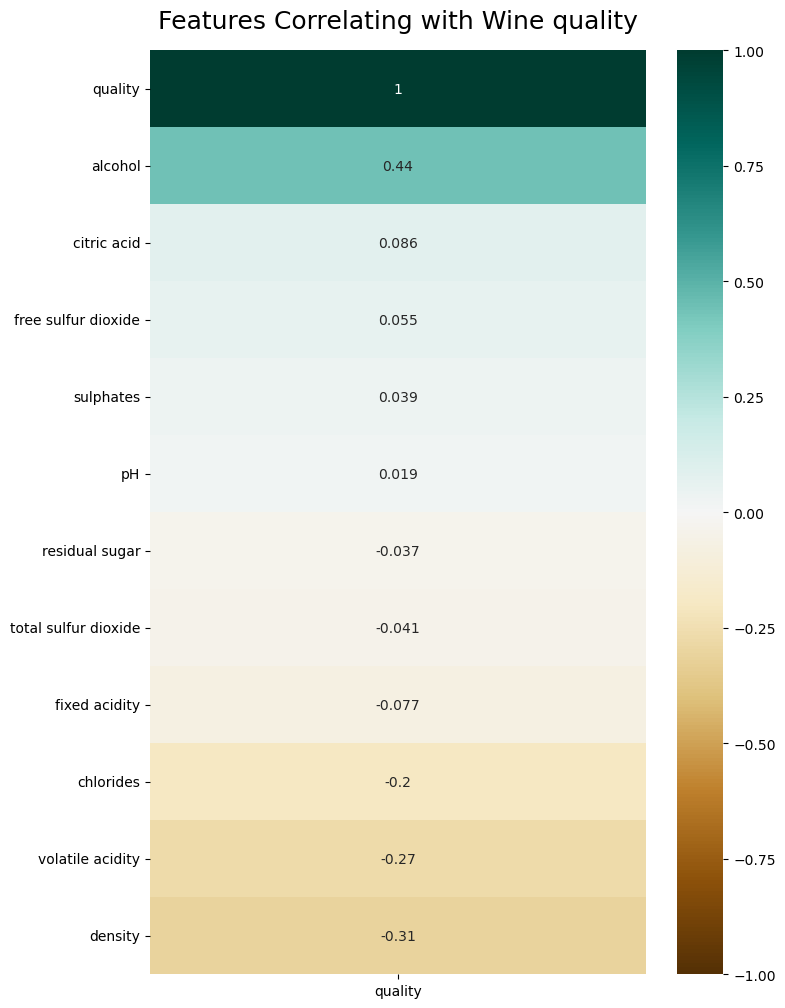

In [7]:
corr = wine_data.corr(numeric_only=True)[['quality']].sort_values(by='quality', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Wine quality', fontdict={'fontsize':18}, pad=16)


### Mutual Information (instead of correlation)

In [8]:
# Utility functions for visualizing Mutual Information

from sklearn.feature_selection import mutual_info_regression


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [10]:
X = wine_data.copy().dropna()
y = X.pop('quality')

mi_scores = make_mi_scores(X, y)

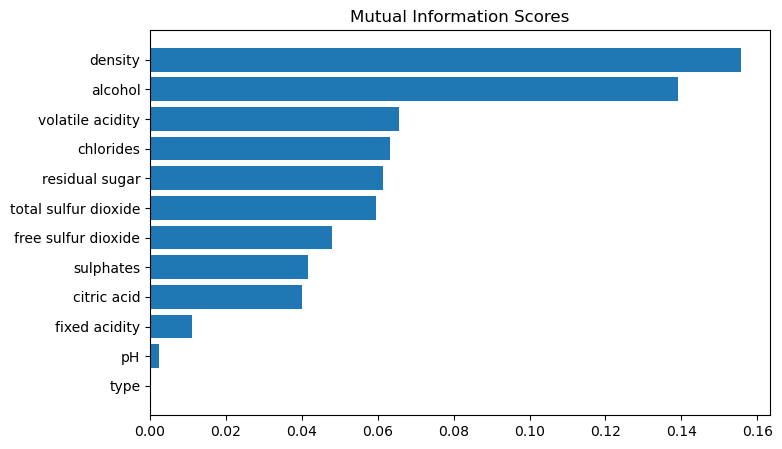

In [11]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Model Development

Handle null data

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Getting list of columns with 'nan' values: 

columns_with_null = [i for i, val in wine_data.isnull().any(axis = 0).items() if val == True]  

for column in columns_with_null:    
    wine_data[column] = imputer.fit_transform(wine_data[[column]])

Split the data into features and target variable

In [ ]:
from sklearn.preprocessing import StandardScaler

X = wine_data.drop(['type', 'quality'], axis=1)
y = wine_data['quality']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

Initialize the model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter = 200)

Train the model

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Model Output & Evaluation

Predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Model accuracy

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}\n')

Model Accuracy: 0.54



Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n')
print(conf_matrix)


 Confusion Matrix:

[[  0   0   2   0   0   0]
 [  0   1  29  16   0   0]
 [  0   0 257 162   1   0]
 [  0   0 141 399  39   0]
 [  0   0  14 166  41   0]
 [  0   0   0  21  11   0]]


Classification Report

In [ ]:
class_report = classification_report(y_test, y_pred, zero_division=0.0)
print('\n Classification Report:\n')
print(class_report)


 Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.02      0.04        46
           5       0.58      0.61      0.60       420
           6       0.52      0.69      0.59       579
           7       0.45      0.19      0.26       221
           8       0.00      0.00      0.00        32

    accuracy                           0.54      1300
   macro avg       0.42      0.25      0.25      1300
weighted avg       0.53      0.54      0.50      1300



## Alcohol % vs. quality Relationship

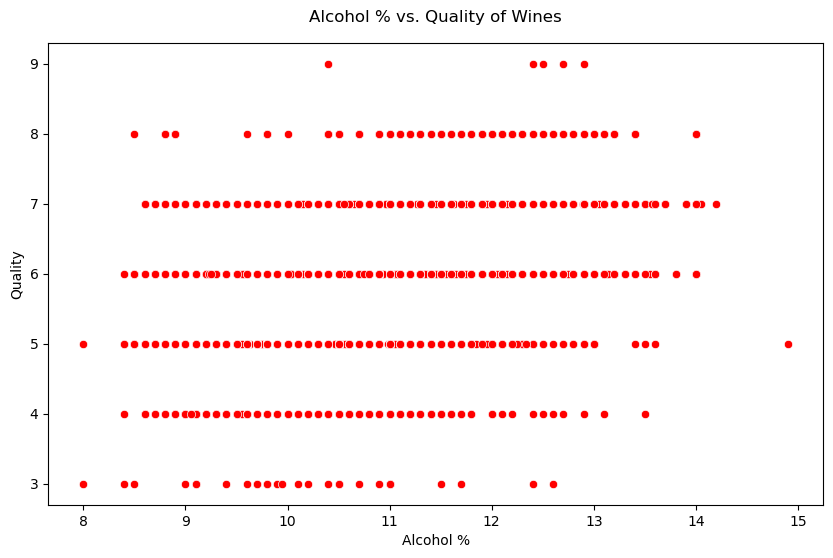

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine_data, color='red')
plt.title('Alcohol % vs. Quality of Wines', pad=15)
plt.xlabel('Alcohol %')
plt.ylabel('Quality')
plt.show()

### Calculate the correlation coefficients

In [ ]:
correlation_coefficient = wine_data['alcohol'].corr(wine_data['quality'])
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

Correlation Coefficient: 0.44


## Improving the Existing Model

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

param_grid = {
    'max_iter': range(200,1000,100)
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': range(200, 1000, 100)},
             scoring='accuracy')

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy (training data): {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test data Accuracy: {:.2f}".format(test_accuracy))

Best Parameters:  {'max_iter': 200}
Best Accuracy (training data): 0.54
Test data Accuracy: 0.54
